In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 (Looped Single Panel Plot)

### Problem 1.1

In [6]:
x = np.linspace(0,1,101) #creating an array from 0 to 1 with 101 steps
x

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

### Problem 1.2

In [7]:
colors = np.array(["cyan", "magenta", "yellow", "black"]) #four colors array
colors

array(['cyan', 'magenta', 'yellow', 'black'], dtype='<U7')

### Problem 1.3

In [8]:
labels = np.array(["$y = x^1$; linear", "$y = x^2$; quadratic", "$y = x^3$; cubic", "$y = x^4$; quartic"]) #creating an array of labels
labels

array(['$y = x^1$; linear', '$y = x^2$; quadratic', '$y = x^3$; cubic',
       '$y = x^4$; quartic'], dtype='<U20')

### Problem 1.4

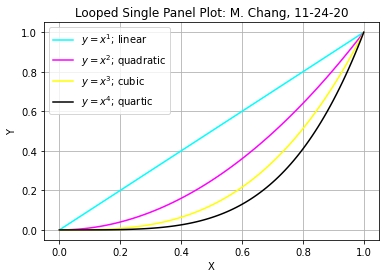

In [9]:
for i in [1,2,3,4]:
    y = x**i #the associated equation, should be linear first, then quadratic, cubic, and quartic
    plt.plot(x, y, label = labels[i-1], color = colors[i-1]) #plotting the equation, labels and colors are an index off, so 1 needs to be subtracted

#labels
plt.xlabel("X")
plt.ylabel("Y")

#grid
plt.grid()

#legend
plt.legend()

#title
plt.title("Looped Single Panel Plot: M. Chang, 11-24-20")

#saving figure
plt.savefig("Chang_LoopedSinglePanel.png", dpi=200)

## Problem 2 (2-Month Weather Station Data Import)

### Problem 2.1

In [15]:
time, kpa, temp, inten = [], [], [], [] #setting up our lists for time, pressure, temperature, and intensity

#path names
folder = "WSD-MayJune2014/"
fname_beginning = "Weather_Data_14-"

for i in np.arange(1,62,1):
    if (i < 32): #for the month of May
        if (i < 10): #if the date is single digit
            fname = folder + fname_beginning + "05-0" + str(i) + ".dat" #need to put a zero before the single digit date
            
            #loading in text
            a,b,c,d = np.loadtxt(fname, skiprows=22,unpack=True)
            
            #adding data to list
            time += list(a)
            kpa += list(b)
            temp += list(c)
            inten += list(d)
        else: #for double digit dates in May
            fname = folder + fname_beginning + "05-" + str(i) + ".dat" #no zero before double digit date
            
            #loading in text
            a,b,c,d = np.loadtxt(fname, skiprows=22,unpack=True)
            
            #adding data to list
            time += list(a)
            kpa += list(b)
            temp += list(c)
            inten += list(d)
    else: #for the month of June
        if (i < 41): #if the date is single digit in June
            fname = folder + fname_beginning + "06-0" + str(i - 31) + ".dat" #need zero before single digit date as specified in format, subtract 31 to get single digit
            
            #loading in data
            a,b,c,d = np.loadtxt(fname, skiprows=22,unpack=True)
            
            #adding to list
            time += list(a)
            kpa += list(b)
            temp += list(c)
            inten += list(d)
        else: #for double digit dates in June
            fname = folder + fname_beginning + "06-" + str(i - 31) + ".dat" #no zero before date needed, subtract 31 to get single digit
            
            #loading in data
            a,b,c,d = np.loadtxt(fname, skiprows=22,unpack=True)
            #adding to list
            
            time += list(a)
            kpa += list(b)
            temp += list(c)
            inten += list(d)
len(time)

175677

### Problem 2.2

In [11]:
bar = np.array(kpa) * (1 / (100)) #converting kPa to bars, which is 1 bar = 100 kPa

t = (time - time[0]) / 86400 #converting to days in array, 1 day = 86400s, our array starts at 0 now

#data starts at 11:49:40, we want t=0 at 0:00 to be our reference point, so we need to shift t so that the data lines up with 11:49:40
#as our starting point

#converting 11:49:40 to days, so we split each element of the time into hours, minutes, and seconds
hour = 11 / 24 #1 day = 24 hours
minute = 49 / 1440 #1 day = 1440 minutes
second = 40 / 86400 #1 day = 86400s

#add up all elements to get days
new_time = hour + minute + second

t = t + new_time

### Problem 2.3

In [12]:
sampling_rate = 1 / 30 # 1 sample every 30 seconds
seconds = 60 # 1 minute = 60 seconds
window = 5 # 5 minute window
n_5 = (sampling_rate) * (seconds) * (window) #number of data points in a 5 minute window
n_5 = int(n_5) #making n_5 an integer
centermean_n = [] #list containing 10 minute means for each point

for n in np.arange(0, len(bar), 1): #going through all the points
    if (n < n_5): #data points within first five minutes are NOT averaged
        centermean_n.append(bar[n])
    elif ((n >= n_5)&(n <= len(bar) - n_5)): #data points after first five minutes and before last five minutes are averaged
        centermean_n.append(np.mean(bar[n - n_5:n + n_5]))
    elif ((n > len(bar) - n_5)): #data points within last five minutes are NOT averaged
        centermean_n.append(bar[n])

# what if we change the averaging window to 30 minutes or 1 hour? Well, we will have many more points in that window, and as a result, the averaged points will have less variation, and thus the line of the data will be smoother (thinner).

### Problem 2.4

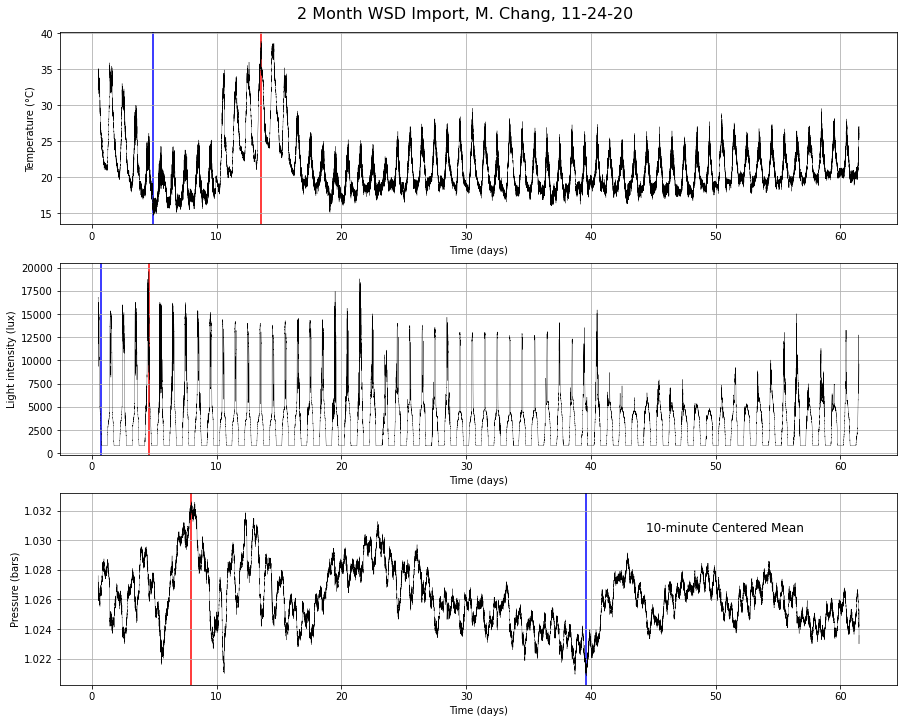

In [13]:
factors = [temp, inten, centermean_n] #data array
lbls = ["Temperature (°C)", "Light intensity (lux)", "Pressure (bars)"] #labels array

f1, ax = plt.subplots(3, 1, figsize = (15,12)) #setting up the figure

for i in [0,1,2]:
    ax[i].plot(t, factors[i], color="black", linewidth=0.3) #plotting the actual data, making it black and thin
    
    #labels
    ax[i].set_xlabel("Time (days)")
    ax[i].set_ylabel(lbls[i])
    
    #finding the day where the minimum value occurs for each dataset
    min_value_BA = (factors[i] == np.min(factors[i]))
    min_value = t[min_value_BA]
    
    ax[i].axvline(x = min_value[0], color = "blue", zorder = -1) #vertical line for minimum is blue
    
    #finding the day where the maximum value occurs of for each dataset
    max_value_BA = (factors[i] == np.max(factors[i]))
    max_value = t[max_value_BA]
    
    ax[i].axvline(x = max_value[0], color = "red", zorder = -1) #vertical line for maximum is red
    
    ax[i].grid() #adding grid lines to plots
    
ax[2].text(0.7, 0.8, str(n_5)+ "-minute Centered Mean", transform = ax[2].transAxes, fontsize = 12) #putting 10-minute mean label at top right

#adding title
plt.suptitle("2 Month WSD Import, M. Chang, 11-24-20", y = 0.91, fontsize = 16)

#saving figure
plt.savefig("Chang_2MonthWSD.png", dpi=200)

### Problem 2.5

In your opinion, which sensor is working the best?</br>
<font color = "red"> The light sensor because it's constant and steady. </font>

Why is there a minimum in the light intensity data? What does it mean that the light intensity data has
this minimum? </br>
<font color = "red"> Because it's night, and there's no sun? </font>

Similarly, why are there spikes in the light intensity data? Roughly, what time does that correspond to
per day? </br>
<font color = "red"> Because the sun is out, and it's about noon when the sun is at peak intensity in the sky. </font>

Why is there so much more structure in the 10-minute centered mean pressure data, versus the raw
data? </br>
<font color = "red"> Because we have removed the flipping noise by averaging the points, and so the data is more "compact" (less outliers here and there). </font>

Why are there no spikes in light intensity data from about days 42 to 51? </br>
<font color = "red"> There are might be clouds covering up the sun? </font>

## Problem 3 (The Sierpinski Triangle)

### Problem 3.1

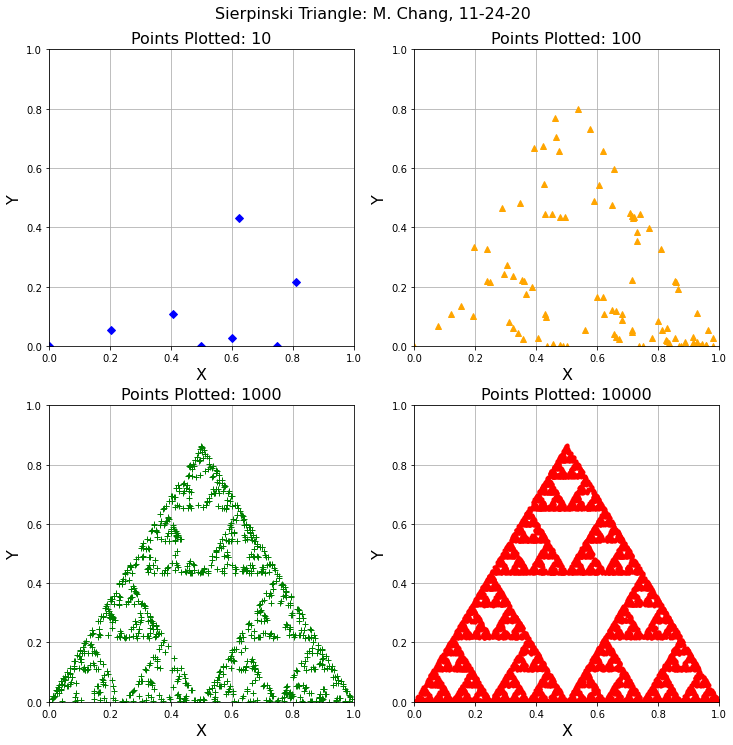

In [14]:
plt.figure(figsize = (12,12)) #setting up figure window
shape = ["D", "^", "+", "."]#shape marker list: diamonds, triangles, plus signs, and points
colors = ["blue", "orange", "green", "red"] #colors we will be using
fs=16 #fontsize for text

for s in np.arange(0, 4, 1): #this outer loop for choosing iteration size and setting up the subplots
    #initial values are zero
    x_n = 0
    y_n = 0
    
    #lists to contain the plotted values
    x = [x_n]
    y = [y_n]
    
    #iteration size we are looping through
    i = 10 ** (s + 1)
    
    for n in np.arange(0, i - 2, 1): #choosing the rules and how many times based on the iteration size
        rule = np.random.randint(1,4) #randomly choosing a number between 1-3, corresponding to a rule
        if (rule == 1): #rule 1
            
            #equations
            x_n = 0.5 * x_n
            y_n = 0.5 * y_n
            
            #adding to lists
            x.append(x_n)
            y.append(y_n)

        elif (rule == 2): #rule 2
            
            #equations for x and y
            x_n = (0.5 * x_n) + 0.25
            y_n = (0.5 * y_n) + (np.sqrt(3) / 4)
            
            #adding to lists
            x.append(x_n)
            y.append(y_n)
            
        elif (rule == 3): #rule 3
            
            #equations for x and y
            x_n = (0.5 * x_n) + 0.5
            y_n = 0.5 * y_n
            
            #adding to lists
            x.append(x_n)
            y.append(y_n)    
    
    #creating the subplot
    plt.subplot(2, 2, s + 1)
    
    #the actual data
    plt.plot(x, y, marker=shape[s], color=colors[s], ls = "None")
    
    #labels and title
    plt.title("Points Plotted: " + str(i), fontsize=fs)
    plt.xlabel("X", fontsize = fs)
    plt.ylabel("Y", fontsize = fs)
    
    #setting window to go from 0 to 1
    plt.xlim(0,1)
    plt.ylim(0,1)
    
    #grid lines
    plt.grid()

plt.suptitle("Sierpinski Triangle: M. Chang, 11-24-20", y = 0.93, fontsize=fs)
plt.savefig("Chang_Sierpinski.png", dpi = 200)

#To make N = 10^2, 10^3, 10^4, 10^5, we change the script by one number by changing i = 10 ** (s + 1) to be i = 10 ** (s + 2)

## Feedback

1. This assignment took me about 4 hours
2. I thought it was a bit on the harder side
3. I feel a bit more anxious because if I had these problems on an exam, there's no way I would have been able to finish on time (lots of just sitting, having to think what to do next, how to carry, and looking things up even if prior knowledge is enough) </br>

4 & 5. I attend lecture!